<a href="https://colab.research.google.com/github/dudalszz/Analise_de_Dados-Eu_ProgrAmo/blob/main/analise_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

#Importações de Bibliotecas

In [ ]:
from google.colab import drive

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from scipy import stats

In [ ]:
from scipy.stats import chi2_contingency

# Uso da biblioteca Pandas

In [ ]:
#criando conexão com o drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#executando e chamando a tabela, atribuindo a variavel dados
dados = pd.read_excel('/content/drive/MyDrive/PrograMariaDados/planilha_modulo3.xlsx')

In [ ]:
#visualizando a tabela
dados

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0
4269,4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,...,Indústria,de 1.001 a 3.000,0.0,NaN,Outra Opção,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,989.0


In [ ]:
dados.head(10)

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
6,6,zytlxsdgalh22cgrijvzytlxa49i8yzx,21.0,17-21,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Menos de 1 ano,4491.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
8,8,zy4o5dk6iuxpdwgzy4o58xvd6ykwohrj,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de BI/BI Analyst,Sênior,de R$ 6.001/mês a R$ 8.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,7112.0
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0


In [ ]:
dados.tail(10)

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4261,4261,02xomoejng6c9152kde02xomww412qpg,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4262,4262,02vlm03c29g3fcys8tj06102vlm0983h,31.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,de 3 a 4 anos,18402.0
4263,4263,02ido3x5siue5if02iz2taqjmcnh58xh,26.0,25-29,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 6.001/mês a R$ 8.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,6641.0
4264,4264,028mfisr3mqazkn5n6swe028mt55nqzq,37.0,35-39,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,de 51 a 100,1.0,Gerente/Head,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 3 a 4 anos,Mais de 10 anos,24543.0
4265,4265,01nmlhyw8w2b4stchg01nmlvlcqp0iis,28.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Marketing,de 1 a 5,0.0,NaN,Analista de Marketing,Pleno,de R$ 2.001/mês a R$ 3.000/mês,de 3 a 4 anos,de 1 a 2 anos,2348.0
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0
4269,4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,...,Indústria,de 1.001 a 3.000,0.0,NaN,Outra Opção,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,989.0
4270,4270,00lb35llmdsidpa00lb35qcdysnzvhv7,24.0,22-24,Masculino,Branca,Não,NaN,NaN,True,...,Agronegócios,de 501 a 1.000,0.0,NaN,Analista de Dados/Data Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3079.0


In [ ]:
#atributos como shape e columns não precisam de parentêses pois não são funções, não precisam retornar um valor específico, só são atributos da planilha
dados.shape

(4271, 28)

In [ ]:
len(dados) #linhas

4271

In [ ]:
dados.columns #ATRIBUTOS

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [ ]:
dados.info() #FUNÇÃO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

In [ ]:
dados.describe() #FUNÇÃO

,Unnamed: 0,IDADE,MUDOU DE ESTADO?,GESTOR?,SALARIO
count,4271.000000,4197.000000,4171.000000,3694.000000,3694.000000
mean,2135.000000,31.169168,0.806281,0.193016,10969.266919
std,1233.075829,6.902803,0.395258,0.394719,19419.753189
min,0.000000,18.000000,0.000000,0.000000,35.000000
25%,1067.500000,26.000000,1.000000,0.000000,4269.500000
50%,2135.000000,30.000000,1.000000,0.000000,7625.500000
75%,3202.500000,35.000000,1.000000,0.000000,12778.500000
max,4270.000000,54.000000,1.000000,1.000000,485191.000000


#Repetindo a primeira análise do excel (parte 1)

In [ ]:
dados[dados['GENERO']=='Feminino'] #filtrando tudo que seja do genero feminino usando o == para comparar o valor

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


In [ ]:
dados[dados['GENERO']!='Masculino'] #retornar valores que não sejam masculinos, podendo ser feminino ou qlqr outro marcado na tabela

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


In [ ]:
dados[dados['GENERO'].str.contains('não', na=False)] #filtrando os 'prefiro não informar', da tabela de gênero e que não mostre os valores nulos

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
562,562,vhuw8xnpbmj6oh20xovhuwcbdl4a12ni,29.0,25-29,Prefiro não informar,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,1528,n2ktdn33istvlu1ha4v3kn2ktdn1rsp1,NaN,55+,Prefiro não informar,Indígena,Prefiro não informar,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 51 a 100,0.0,NaN,Analista de Suporte/Analista Técnico,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Menos de 1 ano,826.0
1913,1913,k3as6jdh3w4jf4ztsw4kpkk3as6jdy19,30.0,30-34,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Outra Opção,de 101 a 500,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,de 3 a 4 anos,11476.0
1925,1925,jzppdwep2kpisqjjzppdh304v83cj7eu,NaN,17-21,Prefiro não informar,Prefiro não informar,Prefiro não informar,"Sim, acredito que minha experiência profission...",Quantidade de oportunidades de emprego/vagas r...,False,...,Setor Farmaceutico,de 1 a 5,0.0,NaN,Outra Opção,Júnior,de R$ 2.001/mês a R$ 3.000/mês,de 1 a 2 anos,Menos de 1 ano,2294.0
2554,2554,f5l206z0hr9uh3nz2iiff5l206c0g10o,20.0,17-21,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,de 1 a 2 anos,1339.0
3090,3090,a6ugmsw7s8hu5aa6uglio5apj74fam9o,26.0,25-29,Prefiro não informar,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,de 101 a 500,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,11545.0
3357,3357,7q0icczxn0l3a894cbx7q0icczjyud0n,29.0,25-29,Prefiro não informar,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 6.001/mês a R$ 8.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,6345.0
3493,3493,6m8haop6lxnaizpwij6m8haopiax98jg,25.0,25-29,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 3 a 4 anos,Menos de 1 ano,3900.0
3610,3610,5mloglozmr0r715mntaxbt6xy8b5olmb,30.0,30-34,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Velocidade de progressão de carreira,True,...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 8.001/mês a R$ 12.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,10174.0
4171,4171,0rksyxnqhn13nwytwi6y0rkssx6jmodf,26.0,25-29,Prefiro não informar,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Outra Opção,de 1.001 a 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Menos de 1 ano,10517.0


In [ ]:
dados[dados['IDADE']>30] #filtrando idades +30

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4257,4257,043snvbsxn3fuyfe043j5comuyu8g6ba,46.0,45-49,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,1.0,Gerente/Head,NaN,NaN,Acima de R$ 40.001/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,62001.0
4260,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4261,4261,02xomoejng6c9152kde02xomww412qpg,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4262,4262,02vlm03c29g3fcys8tj06102vlm0983h,31.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,de 3 a 4 anos,18402.0


In [ ]:
dados[dados['IDADE']>=30] #filtrando valores + ou = a 30

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4261,4261,02xomoejng6c9152kde02xomww412qpg,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4262,4262,02vlm03c29g3fcys8tj06102vlm0983h,31.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,de 3 a 4 anos,18402.0
4264,4264,028mfisr3mqazkn5n6swe028mt55nqzq,37.0,35-39,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,de 51 a 100,1.0,Gerente/Head,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 3 a 4 anos,Mais de 10 anos,24543.0


In [ ]:
dados[(dados['IDADE']>30) & (dados['GENERO']=='Feminino')]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
14,14,zwez49k0jhdvfkfst4zwef137uuf4ivy,35.0,35-39,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,...,Varejo,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,7416.0
23,23,zuqfcwtl9unfc5ezuqfcwm8coytsp5ap,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,de 5 a 6 anos,13418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,4214,0gprow0ownrbfneftxf0gprow4kyrqdy,41.0,40-44,Feminino,Branca,Prefiro não informar,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,...,Seguros ou Previdência,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,11452.0
4221,4221,0fgi5bnb0u9b0fgc0jmqlbnvtu12b76d,34.0,30-34,Feminino,Outra,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Outra Opção,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5687.0
4240,4240,0a5xgxb1ljmuqn0un8a10a5xg4eufs2l,37.0,35-39,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,Finanças ou Bancos,de 51 a 100,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,Menos de 1 ano,1182.0
4247,4247,07qzabp4ujpe4oz81udmb07qzabp4h0t,34.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor de Energia,de 11 a 50,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,5925.0


In [ ]:
dados[(dados['COR/RACA/ETNIA']=='Amarela') & (dados['IDADE']<40)] #filtros são acompanhadas de colchetes

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
13,13,zwh83jpy6x40b95xigsr2zwh83jpflu3,24.0,22-24,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Menos de 1 ano,5296.0
85,85,zfeuk2m9jozahicujlla8zfeuk2g7apj,29.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,159,ytrnz3zyvn791t3dum1ytrnz3zp22tmk,37.0,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Aprov...",True,...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,10628.0
170,170,yri3z491ejizlpj9ylu2k3jyri3z4915,34.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,Acima de 3.000,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,16650.0
195,195,yjbpxmkqz5yidh5oszyjbpxmkgcb1zd9,32.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,3947,2tnsh0gxdu3aq4z2d2tnsh0hk15brx7q,31.0,30-34,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,False,...,Tecnologia/Fábrica de Software,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 25.001/mês a R$ 30.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,29408.0
4058,4058,1t3ndwx8j50k0bz1t3ndwxdpwyg17c2k,27.0,25-29,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",Nível de cobrança no trabalho / Stress no trab...,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,14175.0
4176,4176,0qpa64gqpieg60xpygnajt70qpa64g1a,27.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4207,4207,0ibb8fj9qrwpswfqiil0ibb89e3e4hz3,30.0,30-34,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,...,Área de Consultoria,de 501 a 1.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,de 5 a 6 anos,16298.0


In [ ]:
dados.groupby('GENERO')['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12


In [ ]:
dados.groupby('GENERO', dropna = False)['ID'].nunique() #funções como por exemplo o groupby são acompanhadas de . e os parenteses com os parâmetros;
#usando o groupby p filtrar por genero e usando a coluna de id pra pegar a quantidade de valores, como feito no excel, e o nunique pra somar os valores únicos

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [ ]:
dados['GENERO'].value_counts(dropna=False) #contar os valores da coluna junto com os nulos

,count
GENERO,
Masculino,3194
Feminino,1056
Prefiro não informar,12
NaN,9


In [ ]:
dados[dados['IDADE']>30]['NIVEL'].value_counts() #filtrando a coluna de nivel pela quantidade de pessoas +30

,count
NIVEL,
Sênior,525
Pleno,408
Júnior,274


In [ ]:
dados[(dados['IDADE']>30) & (dados['GENERO']=='Feminino')]['NIVEL'].value_counts() #filtrando e combinando duas colunas, de genero c valor feminino e de nivel pela quantidade de pessoas +30

,count
NIVEL,
Pleno,117
Sênior,114
Júnior,96


In [ ]:
pd.pivot_table(dados, values = ['ID'], index = ['GENERO'], columns=['GESTOR?'],aggfunc='count')  #tabela dinamica p cruzar as colunas, contar c a função aggfunc, valores unicos q tem por genero, na coluna de gestor
#valores por id sendo 0 = false e 1 = true

ID     
GESTOR?                0.0  1.0
GENERO                         
Feminino               754  132
Masculino             2212  578
Prefiro não informar     9    2

#Estatística Básica

In [ ]:
lista_idades = [26,30,32,22,26,35,40,20,43,31,23]

In [ ]:
np.sum(lista_idades)

328

In [ ]:
len(lista_idades)

11

In [ ]:
np.sum(lista_idades)/len(lista_idades) #calculando a media das idades, a soma de todas juntas pela divisão da quantidade de algarismos

29.818181818181817

In [ ]:
media = np.mean(lista_idades)
media
print("Media aritmetica:", media) #salvando o valor de média em uma variável e exibindo ela de diferentes formas

Media aritmetica: 29.818181818181817


In [ ]:
lista_idades2 = [26,30,32,22,26,35,40,20,43,31,23, 100] #calculando media de valores discrepantes (outliers)

In [ ]:
np.sum(lista_idades2)/len(lista_idades2)

35.666666666666664

In [ ]:
media2 = np.mean(lista_idades2)
media2
print("Media aritmetica:", media2)

Media aritmetica: 35.666666666666664


In [ ]:
lista_idades.sort() #funcao para ordenar as idades para calcularmos a mediana
lista_idades

[20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43]

In [ ]:
mediana = np.median(lista_idades) #valor central entre os 11 numeros
mediana

30.0

In [ ]:
lista_idades2.sort() #mediana que tem valores pares, usamos os valores do meio, como são 12 numeros colocamos os 5 para cada lado e somamos os centrais, depois dividimos pela quantidade de numeros desse meio
lista_idades2

[20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43, 100]

In [ ]:
mediana = np.median(lista_idades2)
mediana

30.5

#Voltando para a  tabela

In [ ]:
dados['IDADE'].mean() #calculando a media de idades da tabela

31.169168453657374

In [ ]:
dados['IDADE'].median()

30.0

In [ ]:
dados['IDADE'].mode() #moda é o valor que mais se repete na tabela da coluna de idades

,IDADE
0,27.0


In [ ]:
#desvio médio padrão diz o quão distante estão os dados em relação a media, por ex se estão na msm faixa de idade ou se variam mt
#quanto mais prox de 0, mais prox da media os dados estão
#o valor se justifica pela quantidade de linhas, como a tabela tem 4271 linhas, um std prox ao 7 é um valor alto, pois não são tantas entradas de dados

dados['IDADE'].std()

6.902802832143122

In [ ]:
dados['IDADE'].min() #idade mínima das entradas na tabela

18.0

In [ ]:
dados['IDADE'].max() #idade max das entradas na tabela

54.0

In [ ]:
#filtrando a média de idade das pessoas do gênero feminino

dados[dados['GENERO']=='Feminino']['IDADE'].mean()

31.318051575931232

In [ ]:
#filtrando a média de idade das pessoas do gênero masculino

dados[dados['GENERO']=='Masculino']['IDADE'].mean()

31.147876077930373

In [ ]:
#calculando max, min, media e std da coluna de salário

In [ ]:
dados['SALARIO'].max()

485191.0

In [ ]:
dados['SALARIO'].min()

35.0

In [ ]:
dados['SALARIO'].median()

7625.5

In [ ]:
dados['SALARIO'].std()

19419.75318876344

In [ ]:
#media de salario gen feminino
dados[dados['GENERO']=='Feminino']['SALARIO'].mean()

8673.22460496614

In [ ]:
#media de salario gen masculino
dados[dados['GENERO']=='Masculino']['SALARIO'].mean()

11724.552688172043

In [ ]:
#analisamos que a media dos salarios do genero masculino é maior que a do genero feminino

#Valores Faltantes

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

#Trabalhando a coluna de gênero

In [ ]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [ ]:
dados['GENERO'] = dados['GENERO'].fillna('Prefiro não informar') #substituindo os valores nulos (nan) da tabela de gênero por 'Prefiro não informar'

In [ ]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,21


#Trabalhando a coluna de Idade

In [ ]:
dados['IDADE'].isnull().value_counts() #sabendo os valores nulos da coluna de idade

,count
IDADE,
False,4197
True,74


In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [ ]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts() #quantos valores nulos em cada faixa idade

,count
FAIXA IDADE,
55+,68
17-21,6


In [ ]:
media_17_21 = dados[dados['FAIXA IDADE']=='17-21']['IDADE'].mean() #tirando a média da faixa idade 17-21 das pessoas que tbm responderam idade para substituirmos os valores nulos da idade por essa média
media_17_21

20.205479452054796

In [ ]:
 #usando a função loc p localizar quais exatas linhas da coluna idade estão c valores nulos
 #atribuindo a media 17_21 a esses valores nulos da tabela

dados.loc[(dados['FAIXA IDADE']=='17-21')& (dados['IDADE'].isnull()), 'IDADE'] = media_17_21

In [ ]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,
55+,68


In [ ]:
media_55 = dados[dados['FAIXA IDADE']=='55+']['IDADE'] #percebemos que não tem preenchimento de valor de idade, na faixa idade de pessoas que são 55+, por isso todas as linhas estão nulas e não conseguimos saber a media
media_55

,IDADE
9,NaN
66,NaN
96,NaN
121,NaN
156,NaN
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [ ]:
dados[dados['FAIXA IDADE']=='55+']['NIVEL'] #Sabendo as pessoas 55+ que marcaram o nivel, tbm retornando mts valores nulos, possível erro de preenchimento da tabela

,NIVEL
9,Pleno
66,Júnior
96,Pleno
121,Pleno
156,Júnior
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [ ]:
media_geral = dados['IDADE'].mean() #sabendo a media geral das idades para substituir os valores nulos da coluna 55+
media_geral

31.153517220250375

In [ ]:
dados.loc[(dados['FAIXA IDADE']=='55+') & (dados['IDADE'].isnull()), 'IDADE'] = media_geral
media_geral

31.153517220250375

In [ ]:
#agora o value counts n retorna nenhum valor nulo pois ambos foram preenchidos
#a faixa idade 17-21 os nulos foram substituidos por sua média entre as pessoas que marcaram idade nessa faixa
#a faixa 55+ os nulos foram substituidos pela média geral de todas as idades pois a relação entre a faixa idade +55 e a idade os valores estavam todos nulos, então n seria possível tirar a media


dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,


#Tratando a coluna de salário

In [ ]:
dados[dados['SALARIO'].isnull()]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
12,12,zwr9hqcpg513kaopenzwr9hibaqmldto,31.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,28,ztgepgj82o9oix0nztgepq2trcay6gpv,24.0,22-24,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,34,zsa9i6njd3e594mw0tvlk4zsa9iw86i9,24.0,22-24,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,39,zr4b2vm7dapp3linwqwn7zr4b2vmagqx,32.0,30-34,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,63,zm7o5yquakof0j6zm7vh3o0letznhdvh,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,4242,09oxwp6lsdwhw09ox1uobuxa8cq2pzma,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4252,4252,064pe9b1htw7mflhif064pe95dotv6yf,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4260,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados[dados['SALARIO'].isnull()]['FAIXA SALARIAL'].value_counts()
 #isso significa q quem não respondeu salario, tbm não respondeu faixa salarial, por isso o retorno vazio
 #podemos usar a mediana para saber o valor exato medio entre os salarios, pois a media pode ser afetada se tivermos valores discrepantes na tabela (outilers)

,count
FAIXA SALARIAL,


In [ ]:
mediana_salario = dados['SALARIO'].median() #sabendo a mediana exata entre todos os salarios da tabela
mediana_salario

7625.5

In [ ]:
dados.loc[dados['SALARIO'].isnull(), 'SALARIO'] = mediana_salario #substituindo os valores nulos da coluna salario, pela mediana de todas as idades, atribuindo elas a variavel "mediana_salario"

In [ ]:
dados.loc[dados['SALARIO'].isnull(), 'SALARIO'] #agora retorna a coluna vazia, pois os valores nulos foram preenchidos

,SALARIO


#Valores discrepatntes (outliers)

In [ ]:
lista_idades = [26,30,32,22,26,35,400,20,43,31,23,]

In [ ]:
media = np.mean(lista_idades)
media

62.54545454545455

In [ ]:
desvio = np.std(lista_idades) #usando desvio padrão para identificar outilers (quanto mais prox a 0, mais os dados estão consistentes)
desvio

106.89532997398872

In [ ]:
#metodo para calcularmos a confirmação de outliers, somando a media com 3 vzs o valor do desvio padrão
#esse é o valor de limite superior, acima desse valor estão os outliers

media + 3*desvio

383.2314444674207

In [ ]:
#metodo para calcularmos a confirmação de outliers, diminuindo a media com 3 vzs o valor do desvio padrão
#esse é o valor de limite inferior, abaixo desse valor estão os outielrs

media - 3*desvio

-258.1405353765116

In [ ]:
#fazendo a importação da biblioteca matplotlib para usarmos a função de boxplot para usarmos os quartis de forma visual
#usando quartis para dividir o dado em quatro partes, usando 3 valores, sendo a metade abaixo da mediana, a mediana, e o valor acima dela

{'whiskers': [<matplotlib.lines.Line2D at 0x7a3058799780>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3058799cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3058798070>],
 'medians': [<matplotlib.lines.Line2D at 0x7a305879a200>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a305879a4a0>],
 'means': []}

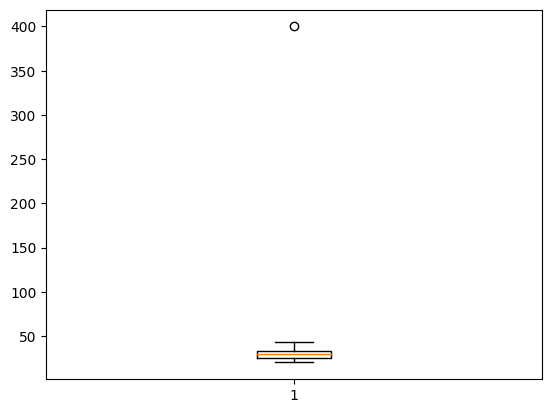

In [ ]:
#linha laranja - mediana
#bordas são os quartis q1 - acima e q3 - abaixo da mediana
#as linhas fora da caixa são os limites superior e inferior
#tudo além das linhas são os outilers, como a bolinha no valor de 400

plt.boxplot(lista_idades)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a305852d960>,
 'caps': [<matplotlib.lines.Line2D at 0x7a305852dea0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a305852d6c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a305852e2c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a305852e560>],
 'means': []}

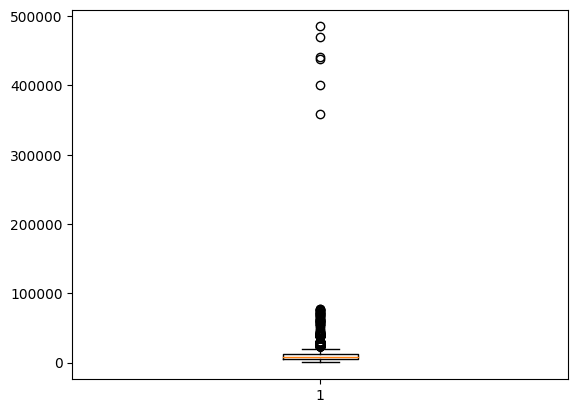

In [ ]:
plt.boxplot(dados['SALARIO'])

In [ ]:
#usando a função quantile do pandas, que retornará os quartis, o primeiro valor pegando 1/4 dos dados (0.25 de 100)
#valores decimais em python não usam "," apenas "."


Q1 = dados['SALARIO'].quantile(0.25)
Q1

4751.5

In [ ]:
#Calculando 3/4 dos dados (0.75)

Q3 = dados['SALARIO'].quantile(0.75)
Q3

11794.5

In [ ]:
#calculando o interquartil, valor entre o q1 e q3

IQR = Q3-Q1
IQR

7043.0

In [ ]:
#calculando o limite superior
#valores acima desse limite, seriam os outliers na teoria, mas é impreciso pois temos mts valores acima de 22mil

lim_superior = Q3 + (1.5 * IQR)
lim_superior

22359.0

In [ ]:
#calculando o limite inferior

lim_inferior = Q1 - (1.5 * IQR)
lim_inferior

-5813.0

In [ ]:
dados['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
de R$ 8.001/mês a R$ 12.000/mês,752
de R$ 4.001/mês a R$ 6.000/mês,584
de R$ 6.001/mês a R$ 8.000/mês,527
de R$ 12.001/mês a R$ 16.000/mês,437
de R$ 3.001/mês a R$ 4.000/mês,303
de R$ 2.001/mês a R$ 3.000/mês,285
de R$ 16.001/mês a R$ 20.000/mês,229
de R$ 1.001/mês a R$ 2.000/mês,216
de R$ 20.001/mês a R$ 25.000/mês,134


In [ ]:
#usando outro método para calcularmos o limite superior, usando o desvio padrão para calcularmos q todo valor q esteja a uma certa distancia da média, é outlier
#iremos calcular a média e desvio padrão

media_salario = dados['SALARIO'].mean()
media_salario

10517.53348162023

In [ ]:
desvio_salario = dados['SALARIO'].std()
desvio_salario

18096.21098911858

In [ ]:
#calculando o numero de limite superior usando a media + um certo numero de desvios padroes, esse numero pode variar a depender da sensibilidade da analise e disposição dos dados, nesse caso, analisando o conexto usaremos uma media de + 3 desvio padrão

In [ ]:
#vamos considerar esse valor do resultado de limite superior aceitável, acima dele, estão os outilers

limite_superior = media_salario + (3 * desvio_salario)
limite_superior

64806.166448975964

In [ ]:
#analisamos o contexto dos dados para sabermos oq fazer c os outilers (remover, substituir ou manter)
#vamos olhar a faixa salarial dessas pessoas c valores outliers

In [ ]:
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts() #filtrando os outliers por salario e faixa salarial

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19
de R$ 30.001/mês a R$ 40.000/mês,3


In [ ]:
#fazendo a média dos valores d 30-40 que não são outilers e substituindo os outliers pelo valor dessa media
#filtrando pela faixa salarial e pela coluna de salário, utilizamos entre os dois filtros o parenteses e o & comercial
#utilizando o segundo filtro para desconsiderarmos os outliers para fazermos a media, usando o "<" para mostrar tudo q esteja abaixo do limite superior, já q acima estão os outliers
#resultado valor da média dos salarios de 30--40mil que estão abaixo do limite superior

media_30_40 = dados[(dados['FAIXA SALARIAL']=='de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO']<limite_superior)]['SALARIO'].mean()
media_30_40

39002.19402985075

In [ ]:
#usando a media para substituir os outilers
#localizando eles usando a função loc, aparecendo as linhas com os 3 valores de resultado

dados.loc[(dados['FAIXA SALARIAL']=='de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO']>limite_superior),'SALARIO'] = media_30_40

In [ ]:
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19


In [ ]:
#fazendo a média dos valores de +40mil que não são outilers e substituindo os outliers pelo valor dessa media
#filtrando pela faixa salarial e pela coluna de salário, utilizamos entre os dois filtros o parenteses e o & comercial
#utilizando o segundo filtro para desconsiderarmos os outliers para fazermos a media, usando o "<" para mostrar tudo q esteja abaixo do limite superior, já q acima estão os outliers
#resultado valor da média dos salarios de +40mil que estão abaixo do limite superior

In [ ]:
#media dos salarios acima de 40 mil/mes

media_40 = dados[(dados['FAIXA SALARIAL']=='Acima de R$ 40.001/mês') & (dados['SALARIO']<limite_superior)]['SALARIO'].mean()
media_40

53127.846153846156

In [ ]:
#usando a media para substituir os outilers
#localizando eles usando a função loc, aparecendo as linhas com os valores de resultado

dados.loc[(dados['FAIXA SALARIAL']=='Acima de R$ 40.001/mês') & (dados['SALARIO']>limite_superior),'SALARIO'] = media_40

In [ ]:
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


{'whiskers': [<matplotlib.lines.Line2D at 0x7a30586ae560>,
 'caps': [<matplotlib.lines.Line2D at 0x7a30586aeaa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a30586ae2c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a30586aefe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a30586af280>],
 'means': []}

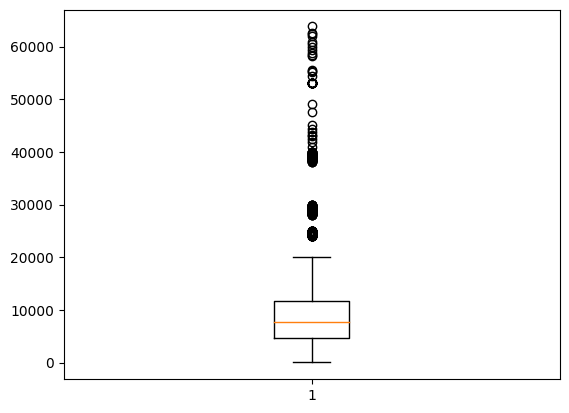

In [ ]:
#a caixa se concentra a maior quantidade de valores, sendo a parte laranja a mediana
#os pontos acima estão abaixo do limite superior de salário e aceitáveis pela média de faixa salárial acima de 40mil
#as bolinhas são valores q distoam dos valores gerais q estão na caixinha, mas pelo contexto não são outliers

plt.boxplot(dados['SALARIO'])

#Distribuição amostral e intervalo de confiança

In [ ]:
#queremos saber se a media de salarios é representativa para o cenario brasileiro, calcularemos o intervalo de confiança para os dados de salario
salarios = dados['SALARIO']
salarios

,SALARIO
0,11194.0
1,4695.0
2,14202.0
3,15463.0
4,7733.0
...,...
4266,4329.0
4267,3758.0
4268,19607.0
4269,989.0


In [ ]:
media_amostral = np.mean(salarios) #calculando a media da amostra de dadados de salario
media_amostral

9904.390109813306

In [ ]:
#calculando o desvio padrão da amostra de dadados de salario
#valor de resultado alto de desvio se considerarmos o valor da média de salario, significa que existem bastante variações de salario na tabela

desvio_amostral = np.std(salarios)
desvio_amostral

8306.104872579352

In [ ]:
#estabelecendo um nivel de confiança pra amostra de 95%

nivel_confianca = 0.95

In [ ]:
tamanho_amostra = len(salarios)
tamanho_amostra

4271

In [ ]:
#dividindo os salarios em grupos para calcularmos a media entre os grupos e saber a diferença entre as medias, ou seja, o erro padrão
#importando a biblioteca scipy e o modulo stats para usarmos a função sem, que calcula o valor médio padrão da amostra e divide os salarios em grupos

In [ ]:
erro_padrao = stats.sem(salarios)
erro_padrao

127.11109872023638

In [ ]:
#calculando o intervalo de confiança com a funçaõ stats.t.interval
#essa função recebe os parametros nivel de confiança, numeros de graus de liberdade da distribuição (tamanho da amostra - 1), loc (média amostral ) e scale (erro padrão da media)

In [ ]:
#o retorno desse valor significa que temos 95% de confiança que a média salarial de pessoas de pessoas de dados no brasil é de '9655.186295869078 a 10153.593923757535'
#olhando pelo contexto, significa a tendencia central, podendo ter pessoas ganhando mais ou menos que esses valores, se analisarmos tbm pelos niveis de cargos

intervalo_de_confianca = stats.t.interval(nivel_confianca, tamanho_amostra-1, loc = media_amostral, scale = erro_padrao)
intervalo_de_confianca

(9655.186295869078, 10153.593923757535)

In [ ]:
#descobrindo com 90% de confiança a media salarial por cargo e genero

In [ ]:
generos = dados['GENERO']
generos

,GENERO
0,Masculino
1,Masculino
2,Masculino
3,Masculino
4,Feminino
...,...
4266,Masculino
4267,Feminino
4268,Masculino
4269,Masculino


#Desafio: calcular com 90% de confiança a media da amostra de dados por gênero

In [ ]:
#agrupando por genero e salario e descobrindo a media entre as duas colunas

media_salarial_genero = dados.groupby('GENERO')['SALARIO'].mean()
media_salarial_genero

,SALARIO
GENERO,
Feminino,8482.256483
Masculino,10393.555984
Prefiro não informar,7017.595238


In [ ]:
#descobrindo a media das amostras por genero

media_amostral_genero = np.mean(media_salarial_genero)
media_amostral_genero

8631.13590172794

In [ ]:
desvio_amostral_genero = np.std(media_salarial_genero)
desvio_amostral_genero

1382.244925334866

In [ ]:
nivel_confianca_gen = 0.90

In [ ]:
tamanho_amostra_genero = len(media_salarial_genero)
tamanho_amostra_genero

3

In [ ]:
erro_padrao_gen = stats.sem(media_salarial_genero)
erro_padrao_gen

977.3947599649767

In [ ]:
#90% de confiança que a média de salários por gênero está entre (5777 e 11485)
intervalo_de_confianca_g = stats.t.interval(nivel_confianca_gen, tamanho_amostra_genero-1, loc = media_amostral_genero, scale = erro_padrao_gen)
intervalo_de_confianca_g

(5777.157296315165, 11485.114507140712)

#Desafio: calcular com 90% de confiança a media da amostra de dados por cargo


In [ ]:
cargos_salario = dados.groupby('CARGO ATUAL')['SALARIO'].mean() #agrupar dados por cargo atual e salario, tirando a media
cargos_salario

,SALARIO
CARGO ATUAL,
Analista de BI/BI Analyst,6302.277778
Analista de Dados/Data Analyst,7425.715180
Analista de Inteligência de Mercado/Market Intelligence,5646.241379
Analista de Marketing,4984.842105
Analista de Negócios/Business Analyst,8043.439024
Analista de Suporte/Analista Técnico,4034.361111
Analytics Engineer,11784.140659
Cientista de Dados/Data Scientist,10429.105562
DBA/Administrador de Banco de Dados,9399.166667


In [ ]:
media_amostral_cargo = np.mean(cargos_salario)
media_amostral_cargo

8329.991189953664

In [ ]:
desvio_amostral_c = np.std(cargos_salario)
desvio_amostral_c

2894.460805884536

In [ ]:
nivel_confianca_c= 0.90

In [ ]:
tamanho_amostra_cargo = len(cargos_salario)
tamanho_amostra_cargo

18

In [ ]:
erro_padrao_c = stats.sem(cargos_salario)
erro_padrao_c

702.0098606983739

In [ ]:
intervalo_confianca_cargo = stats.t.interval(nivel_confianca_c, tamanho_amostra_cargo-1, loc=media_amostral_cargo, scale=erro_padrao_c)
intervalo_confianca_cargo

(7108.770114511751, 9551.212265395576)

#Feature engineering

In [ ]:
#vamos criar e transformar caracteristicas, ou seja, os features, de dados brutos para torna-los mais uteis para algoritmos de machine learning, melhorando a qualidade do resultado final
#podemos criar novas variaveis com base em combinações de variaveis existentes
#usando a função def para receber os dados da coluna gestor e nivel para retornar se a pessoa é gestora ou outro valor de nivel

def preencher_nivel(gestor,nivel):
  if gestor == 1:
    return 'Pessoa Gestora'
  else:
    return nivel

In [ ]:
#aplicando a primeira função com a função do pandas apply, que aplicada a uma tabela permite que apliquemos uma função especifica ao longo das linhas ou colunas da tabela
#usamos a expressão lambda dentro dos parenteses, é uma forma concisa de definir uma função sem precisar nomea-la, geralmente usamos quando temos funções simples, que não usamos varias vezes
#a formula é aplicar uma função, com o uso do lambda, para cada linha, com o apply, na tabela de dados que é o x, ou seja, que o lambda x diz que a função "sem nome" que vamos criar recebe o argumento x, que é a tabela de dados
#como precisamos q a função def preencher_nivel seja executada em todas as linhas da tabela, usamos a função apply e o lambda para isso, para executarmos a função de uma vez só
#precisamos colocar os parametros dentro de preencher_nivel, a coluna gestor e nivel, com x representando a tabela
#estamos aplicando a função preencher nivel na tabela, mandando as colunas de gestor e nivel para retornar uma nova coluna, a 'NOVO_NIVEL'
#precisamos usar o parametro axis=1, pois o apply aplica por colunas no modo padrão dele e precisamos que seja por linhas

dados['NOVO_NIVEL'] = dados.apply(lambda x: preencher_nivel(x['GESTOR?'], x['NIVEL']), axis=1)
dados['NOVO_NIVEL'].value_counts()

,count
NOVO_NIVEL,
Pleno,1060
Júnior,1023
Sênior,898
Pessoa Gestora,713


In [ ]:
#outro exemplo de feature engineering é converter variaveis categoricas em variaveis indicadoras, por ex: coluna de nivel
#podemos separar por tres colunas, de junior, pleno e senior, transformando as variaveis categoricas em um indicador, se a pessoa é ou não aquele nivel, usando true ou false
#usaremos a função get dummies para isso

dados['NIVEL']

,NIVEL
0,Júnior
1,NaN
2,Pleno
3,Sênior
4,Pleno
...,...
4266,Pleno
4267,Pleno
4268,NaN
4269,Júnior


In [ ]:
#veremos a tabela com as novas tres colunas no final dela
#é importante pois os algoritmos de analise e aprendizado de maquina trabalham com dados numericos, dados categoricos são tranformados em numericos ou booleanos (true/false = 1/0)
#uma utilidade do get_dummies para analise de dados é permitir a criação de graficos e tabelas q mostram a contagem ou a proporção de cada categoria
#para adicionarmos as 3 colunas criadas a nossa tabela, atribuimos esse resultado de tabela a nossa tabela anterior de dados

dados = pd.get_dummies(dados, columns= ['NIVEL'])

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior'],
      dtype='object')

In [ ]:
#agora faremos o inverso, transformando variaveis continuas em discretas, transformando a coluna de idade em variaveis discretas q nos diga a qual geração a pessoa pertence
#vamos criar uma função q determine a geração da pessoa

In [ ]:
def determinar_geracao(idade):
  if 39<idade<=58:
    return 'Geração X'
  elif 29<idade<=39:
    return 'Millenial'
  elif 13<idade<=29:
    return 'Geração Z'
  else:
    return 'Outra geração'


In [ ]:
#agora atribuiremos essa função a uma nova coluna na tabela chamada geração, como temos apenas um parametro para especificar, não precisaremos mandar toda a tabela
#usando o apply para uma coluna, dessa vez sem o lambda pois temos um unico parametro, então não precisaremos repetir a função apply

dados['GERACAO'] = dados['IDADE'].apply(determinar_geracao)

In [ ]:
dados['GERACAO'].value_counts()

,count
GERACAO,
Geração Z,1999
Millenial,1761
Geração X,511


#Usando outra tabela com novos dados e colunas e juntando as duas tabelas (merge)

In [ ]:
dados2 = pd.read_excel('/content/drive/MyDrive/PrograMariaDados/Planilha_Aula_parte2.xlsx')

In [ ]:
dados2.head()

,ID,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,de 1 a 2 anos,de 7 a 10 anos,True,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL
1,zzls2oftfn9law393oezzls2ofhvfpzd,de 3 a 4 anos,Menos de 1 ano,False,Falta de oportunidade de crescimento no empreg...,"Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,de 3 a 4 anos,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,Não tenho experiência na área de dados,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL


In [ ]:
#usando a coluna de id, que pode ser encontrada nas duas tabelas, para fazermos o merge
#usando o parâmetro on para dizer qual dado em comum entre as tabelas
#usando o parâmetro how para dizer como queremos que seja feito o merge, mantendo os dados em comum ou todos, sou só da esquerda ou direita, usaremos o da equerda nesse caso
#atribuiremos essa tabela aos dados


dados = dados.merge(dados2, on='ID', how='left')

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satis

In [ ]:
dados['Você pretende mudar de emprego nos próximos 6 meses?'].value_counts()

,count
Você pretende mudar de emprego nos próximos 6 meses?,
"Não estou buscando, mas me considero aberto a outras oportunidades",1354
Estou em busca de oportunidades dentro ou fora do Brasil,1011
Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses,978
"Estou em busca de oportunidades, mas apenas fora do Brasil",353


In [ ]:
#criaremos duas colunas a partir dessa, uma para dizer se a pessoa está em busca ou n de emprego, outra para aberta a oportunidades ou n
#veremos as opções de pessoas que estão em busca de emprego, usando o "em busca" para criar uma coluna e definir true ou false
#usaremos a função contains para procurarmos uma palavra ou trecho especifico para sabermos as pessoas que estão em busca ou n de emprego

In [ ]:
dados['EM_BUSCA'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('em busca', case = False)
dados['EM_BUSCA'].value_counts()

,count
EM_BUSCA,
False,2332
True,1364


In [ ]:
#criaremos uma coluna de 'aberto a oportunidades, usando a palavra 'aberto' para fazer a relação, para sabermos quantas pessoas estão abertas ou n, a oportunidades de emprego

dados['ABERTO_OPORTUNIDADES'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('aberto', case = False)
dados['ABERTO_OPORTUNIDADES'].value_counts()

,count
ABERTO_OPORTUNIDADES,
False,2342
True,1354


#Desafio: criar uma nova coluna de etnia simplificando a categoria para 'Branca', 'Não branca' e 'outros'

In [ ]:
#usaremos a função def para determinar as etnias com base no que foi registrado na tabela

In [ ]:
def determinar_cor (cor):
  if cor == 'Branca':
    return 'Branca'
  elif cor == 'Preta':
    return 'Não branca'
  elif cor == 'Parda':
    return 'Não branca'
  elif cor == 'Amarela':
    return 'Não branca'
  elif cor == 'Indígena':
    return 'Não branca'
  elif cor == 'Prefiro não informar':
    return 'Prefiro não informar'
  else:
    return 'Outras etnias'

In [ ]:
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,2746
Parda,1054
Preta,291
Amarela,128
Prefiro não informar,26
Outra,17
Indígena,11


In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satis

In [ ]:
dados['ETNIA_SIMPLIFICADA'] = dados['COR/RACA/ETNIA'].apply(determinar_cor)
dados['ETNIA_SIMPLIFICADA'].value_counts()

,count
ETNIA_SIMPLIFICADA,
Branca,2746
Não branca,1484
Prefiro não informar,26
Outras etnias,17


# Correlação, diferentes funções para dados discretos e contínuos

In [ ]:
#os valores para correlação: 0 (nenhuma correlação), 1(correlação positiva), -1(correlação negativa)
#trabalharemos a correlação da coluna idade e salário, para analisarmos se a medida que a idade avança, os salários acompanham o ritmo
#usaremos a função corr do pandas para fazer a correlação de dados continuos, essa função em sua forma padrão se baseia na correlação de pearson, mas podemos mudar o parâmetro
#a coluna idade e salario tem valores continuos, então podemos usar a função corr

In [ ]:
#o valor indica uma correlação n tão proxima entre as variaveis, pois está mais proximo de 0 do que de 1
#indica que n há uma correlação forte de idade e salario, ou seja, a idade não sendo um fator importante para o salário aumentar

correlacao_continua = dados['IDADE'].corr(dados['SALARIO'])
correlacao_continua

0.2902441968622099

In [ ]:
#descobriremos os fatores importantes para o aumento salarial
#como temos uma tabela com muitas colunas de valores continuos, podemos usar o mapa de calor (retorna visualmente a correlação entre as variaveis continuas da tabela)

In [ ]:
#calcularemos a correlação de variaveis discretas, veremos a relação de educação e raça, para o calculo de correlação de variaveis categoricas, utilizaremos o coeficiente de cramer
#coeficiente de cramer - normalização de 0 a 1 da correlação das variaveis, onde 0 indica nenhuma associação e 1 indica associação completa
#usaremos uma função para calcular o coeficiente que receberá as colunas da correlação
#usaremos a tabela cruzada (função do pandas cross table) para indicar o parametro de quantas vezes os dados das colunas se cruzam na tabela
#importaremos da biblioteca stats para usarmos a função chi2_contingency, essa função compara a distribuição obervada na tabela cruzada, com uma distribuição esperada se as duas variaveis fosse independentes uma da outra, quanto maior a diferença entre a distribução observada e esperada, maior será o valor do chi2, oq indica uma associação mais forte entre as variaveis
#chamaremos a função e enviaremos como parâmetro a tabela cruzada, colocando 0 entre [], pois a função chi2 retorna varios resultados, e queremos apenas o primeiro
#salvaremos o resultado na variavel chi2
#usaremos o np sum para retornar a soma de cada categoria da coluna nivel de ensino
#faremos o calculo do minimo valor do tamanho da tabela - 1
#a formula do valor do coeficiente de cramer é a raiz quadrada (função do np squareroot 'sqrt') do chi2, dividido pela muliplicação da soma pelo valor minimo

def cramer_coeficiente(coluna1, coluna2):
  tabela_cruzada = np.array(pd.crosstab(coluna1, coluna2))
  chi2 = chi2_contingency(tabela_cruzada)[0]
  soma = np.sum(tabela_cruzada)
  mini = min(tabela_cruzada.shape)-1
  cramer = np.sqrt(chi2/(soma*mini))
  return cramer

In [ ]:
#observamos pelo coeficiente que as colunas não possuem quase nenhuma relação, mas temos que nos atentar ao contexto da nossa realidade
#podemos explicar a baixa correlação na tabela pelo fato das pessoas q estão na area de ti já terem uma formação, msm sendo de diferentes etnias

cramer_coeficiente(dados['COR/RACA/ETNIA'], dados['NIVEL DE ENSINO'])

0.04499106580480143

In [ ]:
tabela_cruzada = pd.crosstab(dados['COR/RACA/ETNIA'], dados['NIVEL DE ENSINO'])
tabela_cruzada

NIVEL DE ENSINO,Doutorado ou Phd,Estudante de Graduação,Graduação/Bacharelado,Mestrado,Não tenho graduação formal,Prefiro não informar,Pós-graduação
COR/RACA/ETNIA,,,,,,,
Amarela,7,15,50,14,2,0,40
Branca,127,365,999,355,65,8,827
Indígena,0,2,4,2,0,0,3
Outra,0,0,6,3,1,0,7
Parda,50,178,333,113,33,3,344
Prefiro não informar,1,2,14,1,0,1,7
Preta,6,51,104,33,9,0,88


In [ ]:
#precisamos verificar a tabela em sua matriz, apenas numeros, sem os cabeçalhos, utilizaremos a função array da biblioteca nunpy para isso

np.array(tabela_cruzada )

array([[  7,  15,  50,  14,   2,   0,  40],
       [127, 365, 999, 355,  65,   8, 827],
       [  0,   2,   4,   2,   0,   0,   3],
       [  0,   0,   6,   3,   1,   0,   7],
       [ 50, 178, 333, 113,  33,   3, 344],
       [  1,   2,  14,   1,   0,   1,   7],
       [  6,  51, 104,  33,   9,   0,  88]])

#Verificando a correlação de nivel de ensino e gênero

In [ ]:
def cramer_coeficiente(coluna1, coluna2):
  tabela_cruzada = np.array(pd.crosstab(coluna1, coluna2))
  chi2 = chi2_contingency(tabela_cruzada)[0]
  soma = np.sum(tabela_cruzada)
  mini = min(tabela_cruzada.shape)-1
  cramer = np.sqrt(chi2/(soma*mini))
  return cramer

In [ ]:
tabela_cruzada = pd.crosstab(dados['GENERO'], dados['NIVEL DE ENSINO'])
tabela_cruzada

NIVEL DE ENSINO,Doutorado ou Phd,Estudante de Graduação,Graduação/Bacharelado,Mestrado,Não tenho graduação formal,Prefiro não informar,Pós-graduação
GENERO,,,,,,,
Feminino,57,104,365,133,24,3,372
Masculino,134,506,1138,386,86,8,936
Prefiro não informar,0,3,7,2,0,1,8


In [ ]:
np.array(tabela_cruzada)

array([[  57,  104,  365,  133,   24,    3,  372],
       [ 134,  506, 1138,  386,   86,    8,  936],
       [   0,    3,    7,    2,    0,    1,    8]])

In [ ]:
#Coreealação de nivel de ensino e genero

def cramer_coeficiente2(coluna1, coluna2):
  tabela_cruzada = np.array(pd.crosstab(coluna1, coluna2))
  chi2 = chi2_contingency(tabela_cruzada)[0]
  soma = np.sum(tabela_cruzada)
  mini = min(tabela_cruzada.shape)-1
  cramer = np.sqrt(chi2/(soma*mini))
  return cramer

In [ ]:
#vemos uma correlação praticamente alta entre as colunas, o que faz sentido tbm se olharmos o contexto real da nossa realidade

cramer_coeficiente2(dados['GENERO'], dados['NIVEL DE ENSINO'])

0.076119232802818

In [ ]:
#salvaremos o resultado utilizando a biblioteca pandas, pegando os dados e salvando em csv, usando esse formato para evitar problemas de compatibilidade, alem da facilidade da leitura e manipulação de dados em csv por meio de scripts, são mais compactos e mais faceis de serem lidos por programas e linguagens de programação
#o index false serve para não criar uma coluna apenas com os numeros de indices

dados.to_csv('/content/drive/MyDrive/PrograMariaDados/analise_dados.csv', index=False)

#Conectando SQL com Pandas

In [ ]:
#importando a biblioteca sqlite3, serve para conectar, interagir e manipular os bancos de dados do tipo sql, sendo essa biblioteca específica do sqlite, que usamos no dbeaver para fazer a analise
#criaremos a conexão com o banco de dados usando a função connect, passando o caminho do arquivo do dbeaver upado no drive

import sqlite3

In [ ]:
#usando a variavel conexao p referenciar a conexao c o banco

conexao = sqlite3.connect('/content/drive/MyDrive/PrograMariaDados/status_brasil')

In [ ]:
#faremos uma consulta no nosso banco
#usaremos aspas duplas no select para não dar convergencia de aspas

query = "SELECT * FROM Municipios_Brasileiros WHERE Cidade = 'Itaquaquecetuba';"
query

"SELECT * FROM Municipios_Brasileiros WHERE Cidade = 'Itaquaquecetuba';"

In [ ]:
#usaremos para fazer a conexao c o banco sql um comando do pandas chamado read_sql, usando os parametros da quey e o CON=, que será a variavel de conexão

In [ ]:
pd.read_sql(query, con=conexao)

,Cidade,Estado,Regiao,municipio_ID
0,Itaquaquecetuba,SP,Sudeste,5043


In [ ]:
#exemplificando comportamentos de string para continuarmos nossa atribuição de lista_estados na função WHERE
#usando a função format, usando o {} para informar onde vai a variavel, que está dentro do parenteses do format


a = 'batata'
print('eu gosto de {}'.format(a))

eu gosto de batata


In [ ]:
#[] dentro do format para indicar a ordem dos itens na lista
#também podemos usar a função JOIN do python para juntar strings dentro de uma unica string, por ex para colocarmos muitos itens em nosso codigo

a=['batata', 'tomate', 'alface']
print('eu gosto de {}, {} e {}'.format(a[0], a[1], a[2]))

eu gosto de batata, tomate e alface


In [ ]:
#também podemos usar a função JOIN do python para juntar strings dentro de uma unica string, por ex para colocarmos muitos itens em nosso codigo

print('eu gosto de {}'.format(','.join(a)))

eu gosto de batata,tomate,alface


In [ ]:
pd.read_sql(query, con=conexao)

,Cidade,Estado,Regiao,municipio_ID
0,Itaquaquecetuba,SP,Sudeste,5043


In [ ]:
#para os dados da nossa tabela do dbeaver conter apenas os estados da tabela anterior que estamos analisando, podemos listar os estados da pesquisa e fazer a consulta por cima dessa lista
#leremos o arquivo e listaremos os estados, usaremos o pandas para ler o arquivo csv

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/PrograMariaDados/analise_dados.csv')

In [ ]:
#listaremos os estados unicos dentro da coluna de estado

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satis

In [ ]:
dados['UF ONDE MORA']

,UF ONDE MORA
0,DF
1,PA
2,DF
3,MG
4,PA
...,...
4268,SP
4269,MG
4270,SP
4271,SP


In [ ]:
#fazendo a listagem de estados unicos, usaremos apenas os dados dessa tabela, para não precisar filtrar no dbeaver pois temos mais estados no banco de dados do que nessa tabela de base de dados
#mudando do modo de exibição de array para lista usando a função list
#atribuindo a variavel lista_estados
#voltando para a query e adicionando uma linha depois do join, a condicional que só retorne os estados que estiverem na variavel lista_estados, usando o WHERE Estado esteja IN lista_estados
#precisaremos juntar a lista_estados de string com a string completa da query, pois se formos pelo valor de lista que é seu formato, vai dar erro

lista_estados = list(dados['UF ONDE MORA'].unique())

In [ ]:
#agora, usarmos a coluna de renda da tabela municipio_status e a coluna de estado da tabela municipios_brasileiros, fazendo join pela coluna de municipio_ID presente em ambas tabelas
#usaremos 3 aspas indicando que todo o texto é codigo
#usaremos a media da renda por estado, usando o avg para calcular
#usaremos o GROUP BY para agrupar por estado os valores de renda
#depois da exemplificação de como funciona uma string, agora retornamos a query
#no sql quando queremos preencher parâmetros, não usamos chaves como na string, completamos com ?, passaremos nossa lista de municipios, preenchendo com ? pela quantidade de municipios, usando a função JOIN e criando uma lista de ? do tamanho da quantidade de municipios que temos
#usando o .format depois da string, indicando os parametros separados por virgula, indicando que é uma lista de ?, preenchido por ? durante ( for _ in) lista_estados
#colocando no where o () e as {} para indicar que vai ser preenchido dentro das chaves
#se rodarmos o codigo sem colocar o parametro 'params', para ler a query, vai dar erro, indicando a variavel q vai ser mostrada


query = '''SELECT Municipios_Brasileiros.Estado, AVG(Municipios_Status.renda) FROM Municipios_Brasileiros
         INNER JOIN Municipios_Status ON Municipios_Brasileiros.municipio_ID = Municipios_Status.municipio_ID
         WHERE Municipios_Brasileiros.Estado IN ({})
         GROUP BY Municipios_Brasileiros.Estado;'''.format(','.join(['?' for _ in lista_estados]))

In [ ]:
print(query)

SELECT Municipios_Brasileiros.Estado, AVG(Municipios_Status.renda) FROM Municipios_Brasileiros
         INNER JOIN Municipios_Status ON Municipios_Brasileiros.municipio_ID = Municipios_Status.municipio_ID
         WHERE Municipios_Brasileiros.Estado IN (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
         GROUP BY Municipios_Brasileiros.Estado;


In [ ]:
#atribuiremos o resultado da query a variavel estados_renda

estados_renda = pd.read_sql(query, con=conexao, params=lista_estados)

In [ ]:
#faremos o merge das duas tabelas usando uma coluna em comum entre as duas, pegaremos a coluna 'uf onde mora' da primeira tabela, e renomearemos para facilitar o processo
#indicando o antes e o depois, e o inplace para atualizar a tabela com o novo valor

dados.rename(columns = {'UF ONDE MORA': 'Estado'},inplace = True)

In [ ]:
#atribuindo a coluna de estados_renda a nossa tabela principal fazendo o merge
#usando o on para indicar a coluna em comum para o merge e o left para indicar que será a nossa tabela de dados principal
#como resultado teremos a adição da coluna de média do indice de renda por estado ao final da tabela
#atribuiremos o resultado a nossa tabela de dados principal

dados = dados.merge(estados_renda, on='Estado', how= 'left')

In [ ]:
#calcularemos a correlação de renda e salário
#esse valor indica uma correlação mt baixa entre indicies de salario e renda, analisando pelo contexto sabemos que existe verdadeira correlação entre indicie de renda e salario, mas baseada no valor do resultado dessa pesquisa pela amostra de pessoas que tiveram seus dados coletados, a correlação foi de quase 0

correlacao_renda_salario = dados['SALARIO'].corr(dados['AVG(Municipios_Status.renda)'])
correlacao_renda_salario

0.12083384881429463

#Fazendo correlação de indicies de salário e educação

In [ ]:
query1 = '''SELECT Municipios_Brasileiros.Estado, AVG(Municipios_Status.educacao) AS "Media Educação" FROM Municipios_Brasileiros
         INNER JOIN Municipios_Status ON Municipios_Brasileiros.municipio_ID = Municipios_Status.municipio_ID
         WHERE Municipios_Brasileiros.Estado IN ({})
         GROUP BY Municipios_Brasileiros.Estado;'''.format(','.join(['?' for _ in lista_estados]))

In [ ]:
print(query1)

SELECT Municipios_Brasileiros.Estado, AVG(Municipios_Status.educacao) AS "Media Educação" FROM Municipios_Brasileiros
         INNER JOIN Municipios_Status ON Municipios_Brasileiros.municipio_ID = Municipios_Status.municipio_ID
         WHERE Municipios_Brasileiros.Estado IN (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
         GROUP BY Municipios_Brasileiros.Estado;


In [ ]:
#fazendo a leitura do banco de dados do dbeaver
estados_educacao = pd.read_sql(query1, con=conexao, params=lista_estados)

In [ ]:
#mergeando as tabelas
dados = dados.merge(estados_educacao, on='Estado', how='left')

In [ ]:
#esse valor indica baixa correlação na amostra de dados coletadas entre os indicies de educação e salário, mesmo sabendo que na realidade isso se comporta de forma diferente
correlacao_educacao_salario = dados['SALARIO'].corr(dados['Media Educação'])
correlacao_educacao_salario

0.15558020288268756

#Visualização de dados

In [ ]:
#fazendo a importação do pandas novamente para ler o arquivo csv

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv('/content/drive/MyDrive/PrograMariaDados/analise_dados.csv')

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO_OPORTUNIDADES,ETNIA_SIMPLIFICADA
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.000000,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,False,False,Não branca
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.000000,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,True,False,Não branca
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.000000,50-54,Masculino,Branca,Não,NaN,NaN,True,...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1,False,True,Branca
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.000000,25-29,Masculino,Branca,Não,NaN,NaN,True,...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0,False,True,Branca
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.000000,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,"Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,False,True,Branca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.000000,25-29,Masculino,Branca,Não,NaN,NaN,True,...,"Remuneração/Salário, Benefícios, Flexibilidade...",Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,Análise de Dados,SQL,False,False,Branca
4269,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.000000,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,"Ambiente e clima de trabalho, Plano de carreir...",Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,"SQL, Python",False,False,Branca
4270,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.000000,25-29,Masculino,Branca,Não,NaN,NaN,True,...,"Remuneração/Salário, Ambiente e clima de traba...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,"Sim, ocorreram layoffs/demissões em massa na e...",Gestor,NaN,False,True,Branca
4271,4269,00xu7yujd7s57emj00xu7y0c3njix3de,20.205479,17-21,Masculino,Branca,Não,NaN,NaN,True,...,Oportunidade de aprendizado e trabalhar com re...,Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retorn

In [ ]:
dados.head()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO_OPORTUNIDADES,ETNIA_SIMPLIFICADA,AVG(Municipios_Status.renda),Media Educação
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,False,False,Não branca,0.863000,0.742000
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,True,False,Não branca,0.572357,0.448664
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1,False,True,Branca,0.863000,0.742000
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0,False,True,Branca,0.652008,0.556862
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,False,True,Branca,0.572357,0.448664


In [ ]:
genero_counts = dados['GENERO'].value_counts()

In [ ]:
#usando a biblioteca matplotlib para visualizar os dados, pois é uma das bibliotecas mais populares em visualização de dados no python, pela variedade de graficos

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#criaremos uma "janela" para o gráfico
#plt.bar para criar um grafico de barras
#indicaremos o value counts em que se baseará o gráfico, seguido de um rótulo para cada fatia do gráfico, usando o parâmetro labels, enviando para labels os parametros de cada item da coluna genero, colocando genero_counts.index
#plt.title para o titulo
#nomearemos os eixos x e y com plt.xlabel e plt.yabel
#plt.show() para exibir o gráfico
#especificar a height dentro do plt.bar e especificar com values o "genero_counts" para a tabela se basear apenas nos numeros da tabela, e não ela inteira
#indicar que o  parametro x é o label de categoria

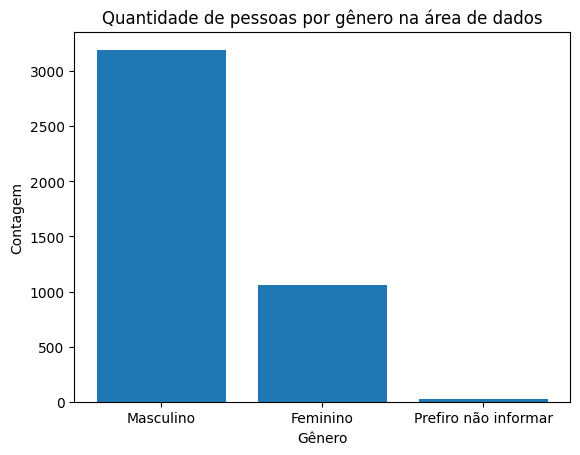

In [ ]:
plt.figure()
plt.bar(height = genero_counts.values, x =  genero_counts.index)
plt.title('Quantidade de pessoas por gênero na área de dados')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

In [ ]:
#utilizaremos a biblioteca seaborn baseada na biblioteca matplot, sendo mais simples e com gráficos esteticamente mais agradaveis, além de simplificar o código para que não precisemos fazer a contagem dos valores, salvar em uma variavel e dps colocar no plot
#essa biblioteca tbm oferece os parâmetros de estilo, como por ex linhas de grade para facilitar a visualização

In [ ]:
import seaborn as sns

<ipython-input-210-8fd72231762b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = dados, x = 'GENERO', palette = 'pastel')


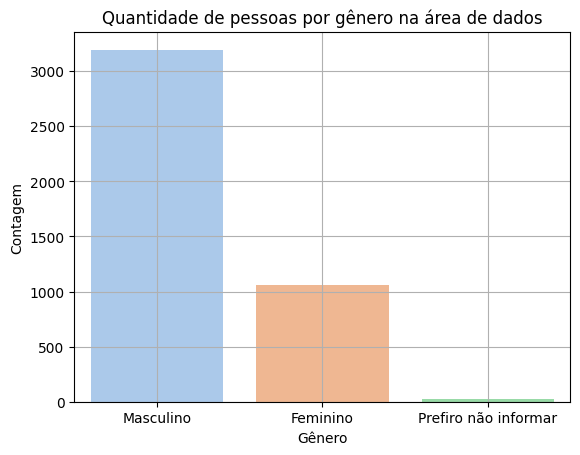

In [ ]:
#usaremos novamente o plt para criar a figure, ou seja, a "janela"
#para criar o gráfico de barras usamos a função count.plot, usada para mostrar a contagem de observação de cada categoria, similar ao value_counts, enviando os parâmetros de data = dados, enviando toda a tabela, o parâmetro de x, especificando a coluna da tabela q nos basearemos
#ainda no count.plot, usamos o parâmetro opcional palete para especificar a  paleta de cores, usaremos a paleta pastel

plt.figure()
sns.countplot(data = dados, x = 'GENERO', palette = 'pastel')
plt.title('Quantidade de pessoas por gênero na área de dados')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

In [ ]:
#faremos um gráfico para sabermos se o salario varia de acordo c a idade, fazendo a media do salario por idade, plotando um gráfico para sabermos se há diferenças

In [ ]:
#criaremos uma variavel que receberá a media de salario por idade

salario_por_idade = dados.groupby('IDADE')['SALARIO'].mean()
salario_por_idade

,SALARIO
IDADE,
18.000000,4230.307692
19.000000,4519.590909
20.000000,5004.272727
20.205479,3536.000000
21.000000,4578.737179
22.000000,4394.689815
23.000000,5602.406897
24.000000,6151.622449
25.000000,7616.392336


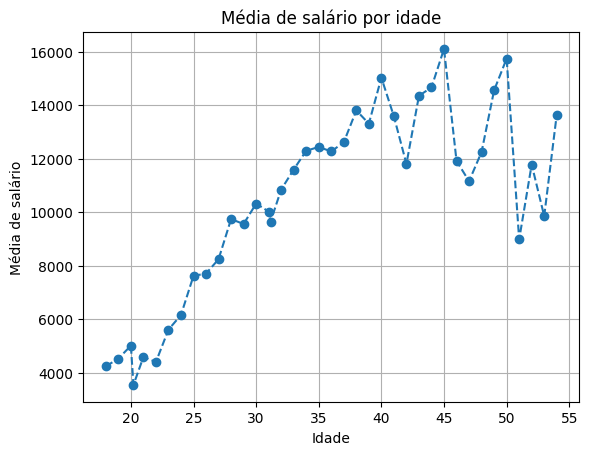

In [ ]:
#fazendo o gráfico baseado nessa analise de média salarial por idade
#colocando a variavel com o index para retornar apenas os valores (dados do eixo x, categorias de idade) e não as colunas e o values para os numeros (medias de salarios por idade)
#marker define o estilo dos marcadores nos pontos de dados, indicando q cada ponto será marcado com um circulo
#linestyle para definir uma linha continua

plt.figure()
plt.plot(salario_por_idade.index, salario_por_idade.values, marker = 'o', linestyle = '--')
plt.xlabel('Idade')
plt.ylabel('Média de salário')
plt.title('Média de salário por idade')
plt.grid(True)
plt.show()

In [ ]:
#importaremos a biblioteca plotly.express para criação de gráficos interativos e dinâmicos, oferecendo suporte para criação de visualização em 3D e mapas geoespaciais

import plotly.express as px

In [ ]:
#criaremos uma variavel q receberá o gráfico
#line para indicar q é um gráfico de linha
#especificando nos () os parametros de salario_por_idade
#precisamos especificar nos eixos os exatos nomes das colunas

fig = px.line(salario_por_idade.reset_index(), x = 'IDADE', y = 'SALARIO', title = 'Média de salário por idade', markers = True)
fig.show()

In [ ]:
#faremos um gráfico de dispersão (scatter plot) para compararmos qual gráfico deixa a visualização dos dados mais aprimorada

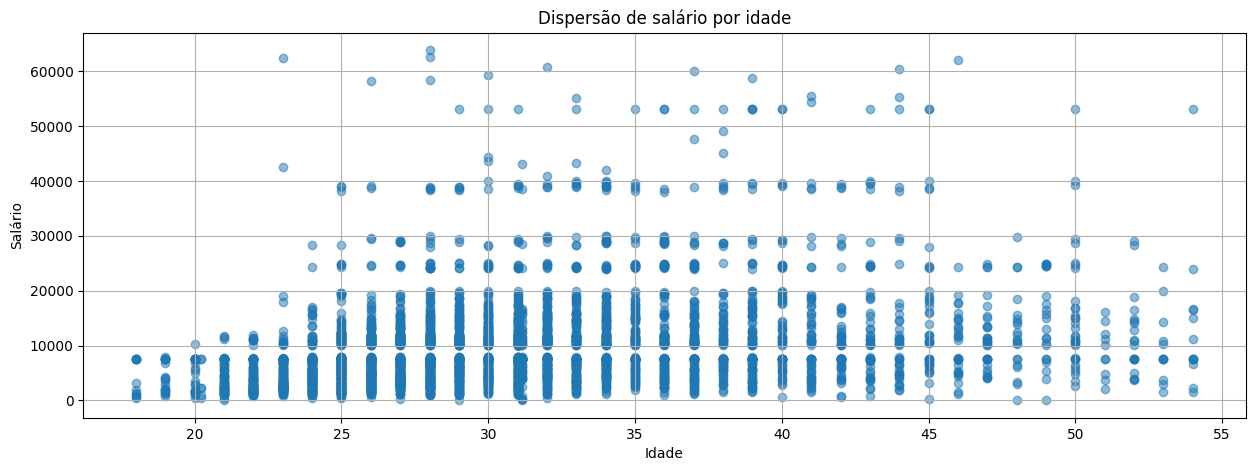

In [ ]:
#no scatter temos que enviar um parâmetro chamado alpha, q define a transparência dos pontos no gráfico de dispersão, qnt mais prox de 0, mais transparente, prox de 1, mais preenchidos
#especificando q idade é eixo x e salario eixo y
#aumentamos o tamanho da janela do gráfico no plt.figure, indicando o parâmetro figsize, colocando entre () os parâmetros em polegadas referentes aos eixos x e y

plt.figure(figsize = (15,5))
plt.scatter(dados['IDADE'], dados['SALARIO'], alpha = 0.5)
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.title('Dispersão de salário por idade')
plt.grid(True)
plt.show()

In [ ]:
#faremos o mesmo gráfico usando o plotly
#podemos perceber os possíveis outliers pela dispersão de bolinhas da concertração de dados
#observamos que não é nesse caso que se aumenta o salário conforme o avanço da idade
fig = px.scatter(dados, x='IDADE', y='SALARIO', title='Dispersão de salário por idade')
fig.show()

#Faça você mesme | Visualização de dados em python
## Utilizando a tabela de municipios brasileiros para fazer a contagem de cidades por estado

In [ ]:
#lendo o arquivo csv referente a tabela de municipios brasileiros
dados1 = pd.read_csv('/content/drive/MyDrive/PrograMariaDados/municipios_brasileiros.csv')
dados1

,codigo_ibge,nome_municipio,codigo_uf,uf,estado,capital,latitude,longitude
0,5200050,Abadia de Goiás,52,GO,Goiás,0,-16.75730,-49.4412
1,3100104,Abadia dos Dourados,31,MG,Minas Gerais,0,-18.48310,-47.3916
2,5200100,Abadiânia,52,GO,Goiás,0,-16.19700,-48.7057
3,3100203,Abaeté,31,MG,Minas Gerais,0,-19.15510,-45.4444
4,1500107,Abaetetuba,15,PA,Pará,0,-1.72183,-48.8788
...,...,...,...,...,...,...,...,...
5565,2933604,Xique-Xique,29,BA,Bahia,0,-10.82300,-42.7245
5566,2517407,Zabelê,25,PB,Paraíba,0,-8.07901,-37.1057
5567,3557154,Zacarias,35,SP,São Paulo,0,-21.05060,-50.0552
5568,2114007,Zé Doca,21,MA,Maranhão,0,-3.27014,-45.6553


In [ ]:
estado_valor = dados['estado'].value_counts()
estado_valor

,count
estado,
Minas Gerais,853
São Paulo,645
Rio Grande do Sul,497
Bahia,417
Paraná,399
Santa Catarina,295
Goiás,246
Piauí,224
Paraíba,223


In [ ]:
#agora vamos refazer as analises usando os gráficos das bibliotecas matplotlib(barra), seaborn(fácil visualização) e pyplot(gráfico interativo) para analisarmos qual se encaixa melhor na visualização dos dados

In [ ]:
import matplotlib.pyplot as plt

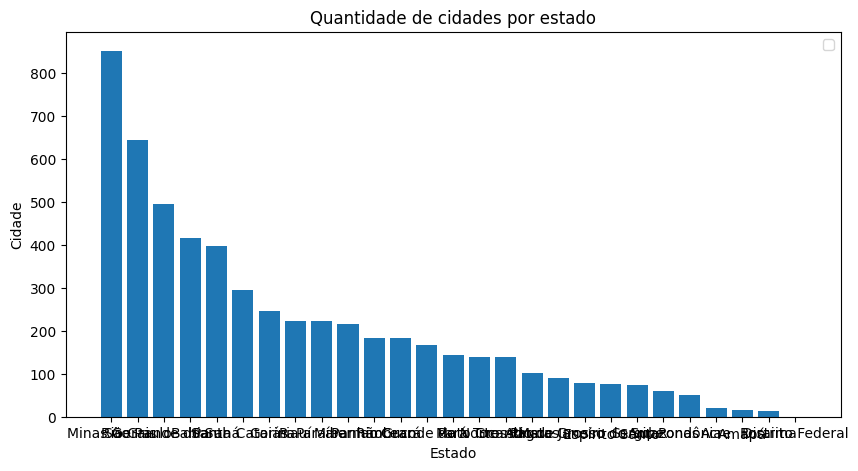

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(height = estado_valor.values, x = estado_valor.index)
plt.title('Quantidade de cidades por estado')
plt.xlabel('Estado')
plt.ylabel('Cidade')
plt.legend()
plt.show()

<ipython-input-248-6f4a3ad75502>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




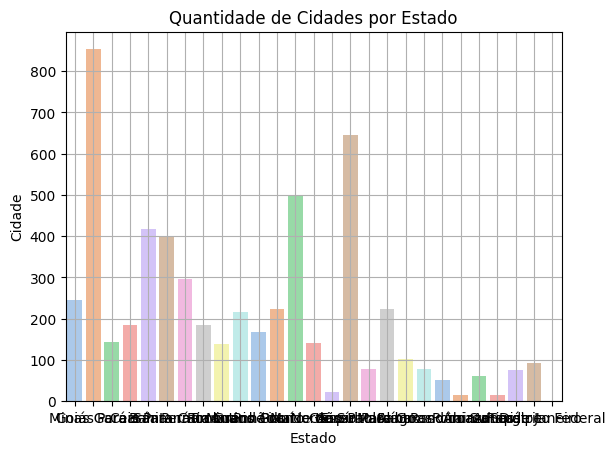

In [ ]:
plt.figure()
sns.countplot(data = dados1, x = 'estado', palette = 'pastel')
plt.title('Quantidade de Cidades por Estado')
plt.xlabel('Estado')
plt.ylabel('Cidade')
plt.grid(True)
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
#concluímos que, entre os 3 usados, o gráfico interativo do plotly se encaixou melhor nesta análise, proporcionando uma melhor visualização dos dados e dos detalhes quando interagimos com o gráfico.

fig = px.line(estado_valor.reset_index(), x = 'estado', y = 'count', title = 'Quantidade de cidades por estado', markers = True)
fig.show()